## Kaggle 프로젝트 - Toyota Corolla 중고차 가격 예측
- 활용 모델
 - KNN(K-Nearest Neighborhood) Regression
 - Linear Regression
- 데이터 : ToyotaCorolla.csv
 - 중고차 1,436대의 사양 및 가격 데이터
 - 사양 정보에 따른 차량의 가격을 예측
- https://www.kaggle.com/datasets/klkwak/toyotacorollacsv?select=ToyotaCorolla.csv

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터 탐색 및 기본 정보 확인

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/0_머신러닝/ToyotaCorolla.csv'

toyota = pd.read_csv(path)
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# 데이터 기본 정보 확인
print(f'Data shape: {toyota.shape}')
print(f'Null count: {toyota.isnull().sum().sum()}')
print()
toyota.info()

Data shape: (1436, 37)
Null count: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436

In [6]:
# 문자형(object) 데이터 조회
toyota.dtypes[toyota.dtypes == 'object']

# Model -> 차량 모델명
# Fuel_Type -> 범주형 변수

Model        object
Fuel_Type    object
dtype: object

In [7]:
# Fuel_Type 범주의 종류 확인
toyota['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

### 데이터 전처리(Data Preprocessing)

#### 데이터 인코딩
- 모델 학습에 사용되는 범주형 변수(Fuel_Type)를 수치형 변수로 변환

In [8]:
import pandas as pd

In [9]:
# Fuel_Type: One-Hot Encoding
toyota = pd.get_dummies(toyota, columns=['Fuel_Type'], prefix='FT')
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'FT_CNG', 'FT_Diesel', 'FT_Petrol'],
      dtype='object')

#### 변수 삭제
- 모델 학습에 불필요한 변수 제거

In [10]:
# 차량 번호(Id), 모델명(Model) 변수 삭제
toyota = toyota.drop(['Id', 'Model'], axis=1)
toyota.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,FT_CNG,FT_Diesel,FT_Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


#### 데이터 스케일링(Data Scaling)
- KNN 알고리즘은 거리를 기반으로 학습과 예측을 수행
- 선형 계열/거리 기반 알고리즘의 성능을 향상시키기 위해 학습 데이터 표준화
- StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# fit -> 표준화 수행
# transform -> numpy 배열 형태로 변환하여 반환(표준화 데이터)
scaled = scaler.fit_transform(toyota)

# 표준화된 데이터를 데이터프레임에 저장
scaled_df = pd.DataFrame(scaled, columns=toyota.columns)
scaled_df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,FT_CNG,FT_Diesel,FT_Petrol
0,0.763763,-1.771966,1.327576,1.541796,-0.574695,-0.768042,0.694219,-0.242893,0.997419,-1.085139,...,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,-0.109454,2.874807,-2.710874
1,0.832715,-1.771966,1.327576,1.541796,0.117454,-0.768042,0.694219,-0.242893,0.997419,-1.085139,...,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,-0.109454,2.874807,-2.710874
2,0.887877,-1.718184,1.029329,1.541796,-0.715386,-0.768042,0.694219,-0.242893,0.997419,-1.085139,...,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,-0.109454,2.874807,-2.710874
3,1.163685,-1.610620,0.432833,1.541796,-0.547650,-0.768042,-1.440467,-0.242893,0.997419,-1.085139,...,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,-0.109454,2.874807,-2.710874
4,0.832715,-1.395491,-0.760158,1.541796,-0.801028,-0.768042,-1.440467,-0.242893,0.997419,-1.085139,...,-0.41387,1.700470,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,-0.109454,2.874807,-2.710874


### 데이터 분할
- feature/target 분리
- train/test 데이터 분할

In [12]:
# feature, target 분리
y_target = scaled_df['Price']
x_features = scaled_df.drop('Price', axis=1)

In [13]:
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터 분할(test_size: 30%)
train_x, test_x, train_y, test_y = train_test_split(x_features, y_target,
                                                    test_size=0.3,
                                                    random_state=1)

print(train_x.shape, test_x.shape)

(1005, 36) (431, 36)


## KNN Regression
- [KNeighborsRegressor document](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

In [14]:
# KNN Regression 알고리즘 import
from sklearn.neighbors import KNeighborsRegressor

# 성능 평가 함수 import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Multiple K에 대한 모델링 및 성능 비교
- K는 이웃 데이터의 수를 의미
- K를 정하는 확실한 기준이 없으므로 다양한 값을 시도
- 다양한 K를 적용한 모델의 성능을 비교하여 최적의 K 찾기

#### MSE(Mean Squared Error)

In [15]:
# K = 1, 3, 5, 7, 9

for K in [1, 3, 5, 7, 9]:
    
    # 객체 생성, 학습/예측 수행
    kn = KNeighborsRegressor(n_neighbors=K)
    kn.fit(train_x, train_y)
    pred = kn.predict(test_x)
    
    # MSE 산출
    mse = mean_squared_error(test_y, pred)
    print(f'K = {K}, Test MSE: {mse:.4f}')

# K = 7일 때의 성능이 가장 우수

K = 1, Test MSE: 0.2040
K = 3, Test MSE: 0.1422
K = 5, Test MSE: 0.1321
K = 7, Test MSE: 0.1261
K = 9, Test MSE: 0.1286


#### 결정계수(R²)
- 전체 변동성 중 회귀식이 설명할 수 있는 변동성의 비율(%)
- 독립변수가 종속변수의 변동을 얼마나 설명하는지 나타내는 지표

In [16]:
# K = 2, 3, ... , 24
n_neighbors = range(2, 25)

# 학습/테스트 데이터 R-squared 리스트 생성
train_r2 = []
test_r2 = []

for K in n_neighbors:

    # 모델 객체 생성
    kn = KNeighborsRegressor(K) # n_neighbors 생략 가능
    kn.fit(train_x, train_y)

    # 학습/테스트 데이터의 R-squared 리스트에 저장 
    # score() -> 모델의 결정계수 산출
    train_r2.append(kn.score(train_x, train_y))
    test_r2.append(kn.score(test_x, test_y))

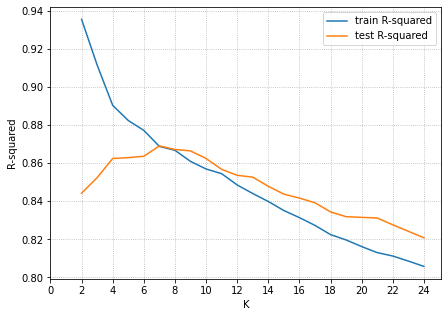

In [17]:
# 시각화: K에 따른 결정계수(R-squared)의 변화

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

# train/test 데이터의 결정계수 그래프(line plot)
plt.plot(n_neighbors, train_r2, label='train R-squared')
plt.plot(n_neighbors, test_r2, label='test R-squared')

plt.xticks(range(0, 25, 2))
plt.ylabel('R-squared')
plt.xlabel('K')
plt.grid(linestyle=':')
plt.legend()
plt.show()

# K = 7일 때 결정계수 최대

### 교차 검증(Cross Validation)
- 교차 검증을 통해 최적의 K 찾기

In [18]:
from sklearn.model_selection import cross_val_score

# K = 1, 2, ... , 50
n_neighbors = range(1,51)

# K에 따른 교차 검증 점수를 저장할 리스트
scores = []

for K in n_neighbors:
    
    kn = KNeighborsRegressor(K)
    cv_score = cross_val_score(kn, train_x, train_y,
                            cv=5, scoring='r2') # default scoring='r2'
    scores.append(cv_score.mean()) # 5개 폴드의 평균을 추가

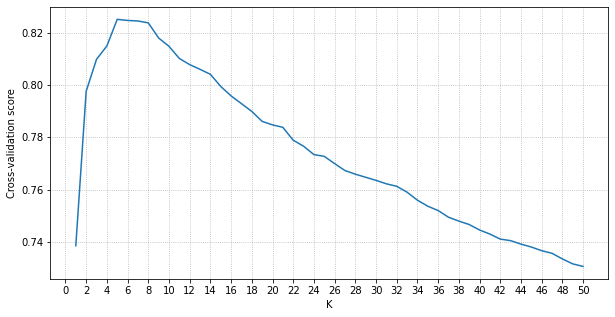

In [19]:
# 시각화: K에 따른 교차 검증 점수의 변화

plt.figure(figsize=(10, 5))
plt.plot(n_neighbors, scores)

plt.xlabel('K')
plt.ylabel('Cross-validation score')
plt.xticks(range(0, 51, 2))
plt.grid(linestyle=':')
plt.show()

# K = 5일 때 교차 검증 성능이 가장 우수

#### Default K에 대한 모델링 및 성능 평가
- default K = 5

In [20]:
# 객체 생성, 모델 학습/예측
kn = KNeighborsRegressor()
kn.fit(train_x, train_y)
pred = kn.predict(test_x)

# 모델 성능 측정
mse_5 = mean_squared_error(test_y, pred)
mae_5 = mean_absolute_error(test_y, pred)
r2_5 = r2_score(test_y, pred)

print('K = 5')
print('='*20)
print(f'Test MSE: {mse_5:.4f}')
print(f'Test MAE: {mae_5:.4f}')
print(f'Test R-squared: {r2_5:.4f}')

# 회귀선이 전체 데이터의 86% 설명 가능

K = 5
Test MSE: 0.1321
Test MAE: 0.2836
Test R-squared: 0.8629


#### Best K에 대한 모델링 및 성능 평가
- best K = 7

In [21]:
# 객체 생성, 모델 학습/예측
kn = KNeighborsRegressor(n_neighbors=7)
kn.fit(train_x, train_y)
pred = kn.predict(test_x)

# 모델 성능 측정
mse_7 = mean_squared_error(test_y, pred)
mae_7 = mean_absolute_error(test_y, pred)
r2_7 = r2_score(test_y, pred)

print('K = 7')
print('='*20)
print(f'Test MSE: {mse_7:.4f}')
print(f'Test MAE: {mae_7:.4f}')
print(f'Test R-squared: {r2_7:.4f}')

# 회귀선이 전체 데이터의 약 87% 설명 가능 -> 약간의 성능 향상

K = 7
Test MSE: 0.1261
Test MAE: 0.2765
Test R-squared: 0.8691


#### Performance Matrix

In [22]:
# 데이터프레임 생성
df = pd.DataFrame(columns=['K', 'MSE', 'MAE', 'R-squared'],
                        index=['default_K', 'best_K'])

# 성능 지표 추가
df.loc['default_K'] = [5, mse_5, mae_5, r2_5]
df.loc['best_K'] = [7, mse_7, mae_7, r2_7]

print('KNN Performance Matrix')
print()
df

KNN Performance Matrix



,K,MSE,MAE,R-squared
default_K,5,0.132083,0.283634,0.862938
best_K,7,0.126131,0.276452,0.869114


## Linear Regression

### Target 분포 확인
- 정답 데이터인 중고차 가격의 분포를 히스토그램으로 확인

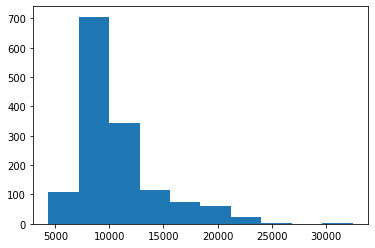

In [23]:
plt.hist(toyota['Price']) # default bins=10
plt.show()

# 불균형한 target 분포

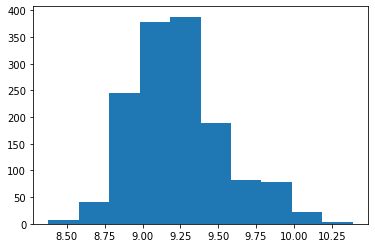

In [24]:
# target 데이터에 대한 로그 변환 수행(정규분포화)
plt.hist(np.log1p(toyota['Price']))
plt.show()

### 데이터(target) 로그 변환
- feature/target 분리 후 target 데이터에 대한 로그 변환 수행
- 로그 변환된 데이터로 모델링 및 학습

In [25]:
# feature, target 분리
y_target = toyota['Price'] # 표준화/로그 변환 이전의 target
x_features = toyota.drop('Price', axis=1)

# target 로그 변환
y_target_log = np.log1p(y_target)

# 학습/테스트 데이터 분할(test_size: 30%)
train_x, test_x, train_y, test_y = train_test_split(x_features, y_target_log,
                                                    test_size=0.3,
                                                    random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_x, train_y)
pred = lr.predict(test_x)

mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print(mse, r2)

0.01283506287258028 0.8460152056395207


In [30]:
# 예측값과 실제값의 분포를 시각화하는 함수 생성

def plot_pred_actual(actual, pred):
    
    df = pd.DataFrame({'actual': actual, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)
    
    plt.figure(figsize=(8, 6))

    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.5, marker='o', color='b')
    
    plt.title('Linear Regression', fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)

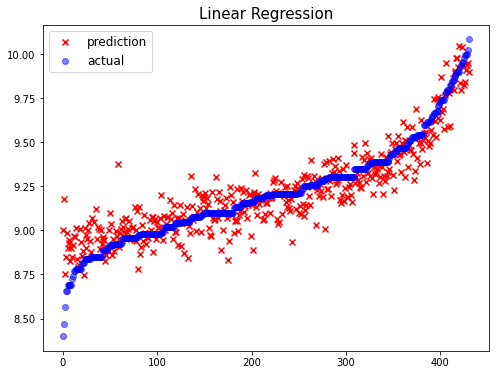

In [31]:
plot_pred_actual(test_y, pred)

### 회귀계수 확인

In [39]:
# 회귀계수 및 절편 확인
bias = lr.intercept_
weight = lr.coef_

print('Bias:', np.round(bias, 4))
print('Weight:', np.round(weight, 4))

# 모든 변수가 가격과 상관관계를 거의 보이지 x

Bias: 5.9624
Weight: [-0.0096 -0.0071  0.0014 -0.      0.0013 -0.0009  0.0444 -0.      0.0082
  0.      0.0431  0.0011  0.0005  0.0333  0.0379  0.0045  0.0022  0.0411
 -0.0119  0.0317  0.1067 -0.0088  0.0128 -0.0039  0.0336 -0.0426  0.0536
  0.0065 -0.0006 -0.0249  0.01   -0.0578 -0.0146 -0.08    0.0069  0.0731]


In [40]:
# 주요 feature 추출: 회귀계수를 소수점 아래 한 자리까지만 나타냈을 때 절댓값이 0보다 큰 변수
coeff = pd.Series(data=np.round(weight, 1), index=x_features.columns) # Series 형태로 저장
coeff = coeff[np.abs(coeff) > 0]

# 내림차순 정렬
sorted_values = coeff.sort_values(ascending=False)
sorted_values

Automatic_airco    0.1
Radio              0.1
FT_Petrol          0.1
Radio_cassette    -0.1
FT_CNG            -0.1
dtype: float64

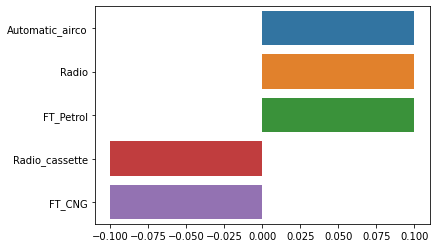

In [41]:
# 주요 변수의 회귀계수 시각화
import seaborn as sns
sns.barplot(x=sorted_values, y=sorted_values.index)

# 데이터셋에 포함된 독립변수와 종속변수 간의 상관관계가 거의 보이지 x